In [1]:

# Import Dependencies
import os
import numpy as np
import pandas as pd
import datetime as dt
from matplotlib import style
import matplotlib.pyplot as plt

#Instead of notebook
%matplotlib notebook


# Reflect Tables into SQLAlchemy ORM

In [2]:

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy import inspect
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy.ext.automap import automap_base


In [3]:

# Create Engine from "hawaii.sqlite" file provided"
engine = create_engine(os.path.join('sqlite:///', '.', 'Resources', 'hawaii.sqlite'))


In [4]:

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)


In [5]:

# We can view all of the classes that automap found
Base.classes.keys()

# Can also view classes with inspector
inspector = inspect(engine)
inspector.get_table_names()



['measurement', 'station']

In [6]:

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [7]:

# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Climate Analysis

In [8]:
## VERIFY Types


# Measurement table columns
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])
    

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
## VERIFY Types

#Station table columns
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])
    

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [10]:

# Design a query to retrieve the last 12 months of precipitation data and plot the results

#### Last 12 months of data
meas_prcp = session.query(Measurement.prcp , Measurement.date).\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()
meas_prcp


[(0.08, '2016-08-24'),
 (2.15, '2016-08-24'),
 (2.28, '2016-08-24'),
 (None, '2016-08-24'),
 (1.22, '2016-08-24'),
 (2.15, '2016-08-24'),
 (1.45, '2016-08-24'),
 (0.08, '2016-08-25'),
 (0.08, '2016-08-25'),
 (0.0, '2016-08-25'),
 (0.0, '2016-08-25'),
 (0.21, '2016-08-25'),
 (0.06, '2016-08-25'),
 (0.11, '2016-08-25'),
 (0.0, '2016-08-26'),
 (0.03, '2016-08-26'),
 (0.02, '2016-08-26'),
 (0.04, '2016-08-26'),
 (0.0, '2016-08-26'),
 (0.01, '2016-08-26'),
 (0.0, '2016-08-27'),
 (0.18, '2016-08-27'),
 (0.02, '2016-08-27'),
 (0.0, '2016-08-27'),
 (0.12, '2016-08-27'),
 (None, '2016-08-27'),
 (0.01, '2016-08-28'),
 (0.14, '2016-08-28'),
 (0.14, '2016-08-28'),
 (0.14, '2016-08-28'),
 (0.6, '2016-08-28'),
 (2.07, '2016-08-28'),
 (0.0, '2016-08-29'),
 (0.17, '2016-08-29'),
 (0.04, '2016-08-29'),
 (None, '2016-08-29'),
 (0.0, '2016-08-29'),
 (0.35, '2016-08-29'),
 (0.9, '2016-08-29'),
 (0.0, '2016-08-30'),
 (0.0, '2016-08-30'),
 (0.02, '2016-08-30'),
 (0.0, '2016-08-30'),
 (0.0, '2016-08-30'),
 (

<IPython.core.display.Javascript object>


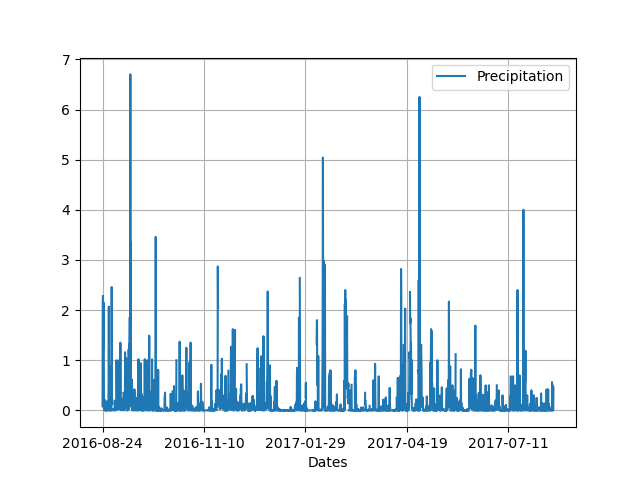

In [11]:
# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(meas_prcp, columns = ['Precipitation', 'Dates'])
df.set_index('Dates')

# Sort the dataframe by date
df_dates = df.sort_values(by = 'Dates')

# Use Pandas Plotting with Matplotlib to plot the data
df_dates.plot(x = 'Dates' , grid = True)

In [12]:

# Save to Images Folder
plt.savefig(os.path.join(".","Images","Avg_Temp_Analysis.png"))


In [13]:

# Use Pandas to calcualte the summary statistics for the precipitation data
df_dates.describe()


,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [14]:

# Design a query to show how many stations are available in this dataset?
station_m = session.query(func.count(Measurement.station)).all()
station_m


[(19550)]

In [15]:

# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
max_stations = session.query( Measurement.station , func.count(Measurement.station)).group_by( Measurement.station ).\
               order_by(func.count(Measurement.station).desc()).all()

my_station = max_stations[0][0]
max_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:

# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
active_station = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),\
                      func.avg(Measurement.tobs)).\
                      filter(Measurement.station == my_station ).all()


print(f"The Minimum for the most active station is  {active_station[0][0]}.")
print(f"The Maximum  for the most active station is {active_station[0][1]}.")
print(f"The Average Temp for the most active station is {round(active_station[0][2],1)}.")

The Minimum for the most active station is  54.0.
The Maximum  for the most active station is 85.0.
The Average Temp for the most active station is 71.7.


In [17]:

# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Create var end_date
Result =  session.query(Measurement.tobs).\
                          filter(Measurement.station == my_station ).\
                          filter(Measurement.date >= '2017,8,23').all()

Result


[(72.0),
 (70.0),
 (64.0),
 (63.0),
 (63.0),
 (62.0),
 (70.0),
 (70.0),
 (62.0),
 (62.0),
 (63.0),
 (65.0),
 (69.0),
 (77.0),
 (70.0),
 (74.0),
 (69.0),
 (72.0),
 (71.0),
 (69.0),
 (71.0),
 (71.0),
 (72.0),
 (72.0),
 (69.0),
 (70.0),
 (66.0),
 (65.0),
 (69.0),
 (68.0),
 (68.0),
 (68.0),
 (59.0),
 (60.0),
 (70.0),
 (73.0),
 (75.0),
 (64.0),
 (59.0),
 (59.0),
 (62.0),
 (68.0),
 (70.0),
 (73.0),
 (79.0),
 (75.0),
 (65.0),
 (70.0),
 (74.0),
 (70.0),
 (70.0),
 (71.0),
 (71.0),
 (71.0),
 (69.0),
 (61.0),
 (67.0),
 (65.0),
 (72.0),
 (71.0),
 (73.0),
 (72.0),
 (77.0),
 (73.0),
 (67.0),
 (62.0),
 (64.0),
 (67.0),
 (66.0),
 (81.0),
 (69.0),
 (66.0),
 (67.0),
 (69.0),
 (66.0),
 (68.0),
 (65.0),
 (74.0),
 (69.0),
 (72.0),
 (73.0),
 (72.0),
 (71.0),
 (76.0),
 (77.0),
 (76.0),
 (74.0),
 (68.0),
 (73.0),
 (71.0),
 (74.0),
 (75.0),
 (70.0),
 (67.0),
 (71.0),
 (67.0),
 (74.0),
 (77.0),
 (78.0),
 (67.0),
 (70.0),
 (69.0),
 (69.0),
 (74.0),
 (78.0),
 (71.0),
 (67.0),
 (68.0),
 (67.0),
 (76.0),
 (69.0),
 

<IPython.core.display.Javascript object>


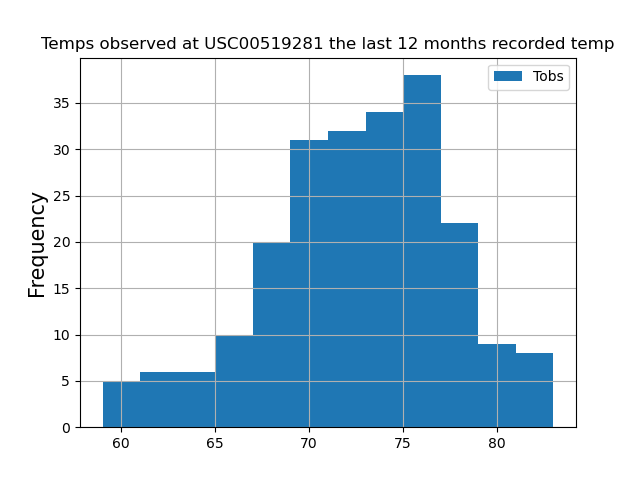

In [18]:
tobs_df = pd.DataFrame(Result , columns = ['Tobs'])

tobs_df.hist( bins = 12)

plt.ylabel("Frequency", fontsize = 15)
plt.title(f"Temps observed at {my_station} the last 12 months recorded temp")
labels = ["Tobs"]
plt.legend(labels)


In [19]:

# Save to Images Folder
plt.savefig(os.path.join(".","Images",f"Temps observed at {my_station}.png"))


## Bonus Challenge Assignment

In [20]:

# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2016-06-01', '2016-06-15'))


[(64.0, 74.15625, 81.0)]


In [21]:

# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [22]:

# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("06-01")

[(64.0, 74.6140350877193, 81.0)]

In [23]:

# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
df_dates.head()


,Precipitation,Dates
0,0.08,2016-08-24
1,2.15,2016-08-24
2,2.28,2016-08-24
3,NaN,2016-08-24
4,1.22,2016-08-24


<IPython.core.display.Javascript object>


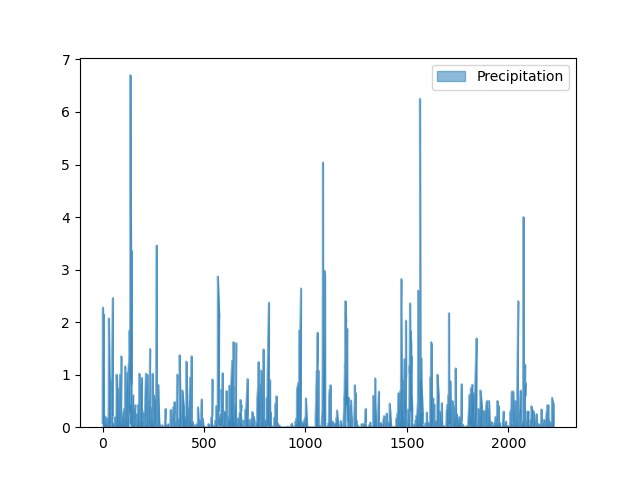

In [24]:

# Plot the daily normals as an area plot with `stacked=False`
# Isn't working correctly
df_dates = df_dates.dropna()
df_dates.plot.area(stacked=False)


In [25]:


## For me
#Do it with hexbins 
df_hex= df_dates.set_index(keys = "Dates", drop = True, inplace=False)
df_hex=df_hex.reset_index()
df_hex.head()

,Dates,Precipitation
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,1.22
4,2016-08-24,2.15
